longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64
Linear Regression
MAE: 50701.77903133013
MSE: 4904399775.949274
R2 Score: 0.6257351821159707


Decision Tree Regressor
MAE: 44221.092054263565
MSE: 4873172902.463179
R2 Score: 0.628118168954783


Random Forest Regressor
MAE: 31667.928267926352
MSE: 2403252006.65341
R2 Score: 0.8166029043940505




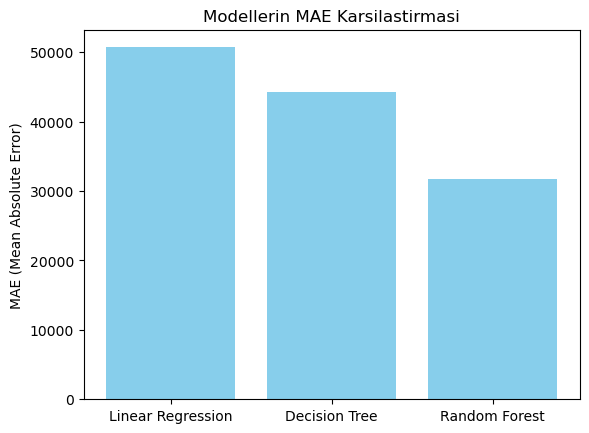

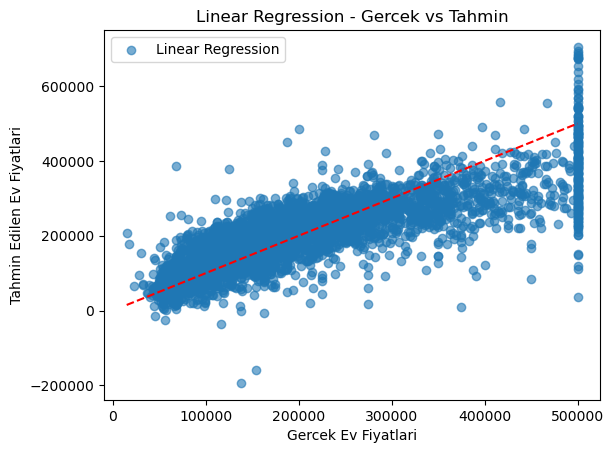

Yeni ev icin Linear Regression tahmini: -2992528.57


In [18]:
# California Housing Prices - Regression Modelleri Karsilastirmasi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


df = pd.read_csv("housing.csv")  # Dosya adina dikkat et


print(df.isnull().sum())
# Sadece total_bedrooms eksik, onu dolduralim
df["total_bedrooms"] = df["total_bedrooms"].fillna(df["total_bedrooms"].mean())


# "ocean_proximity" kategorik, onu one-hot encoding yapalim
df = pd.get_dummies(df, columns=["ocean_proximity"], drop_first=True)

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))
print("\n")

# Model 2: Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R2 Score:", r2_score(y_test, y_pred_dt))
print("\n")

# Model 3: Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Regressor")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))
print("\n")


models = ["Linear Regression", "Decision Tree", "Random Forest"]
mae_scores = [
    mean_absolute_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_dt),
    mean_absolute_error(y_test, y_pred_rf)
]

plt.bar(models, mae_scores, color="skyblue")
plt.ylabel("MAE (Mean Absolute Error)")
plt.title("Modellerin MAE Karsilastirmasi")
plt.show()

# Scatter Plot: Gercek vs Tahmin Değerleri icin Linear Regression
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Gercek Ev Fiyatlari")
plt.ylabel("Tahmin Edilen Ev Fiyatlari")
plt.legend()
plt.title("Linear Regression - Gercek vs Tahmin")
plt.show()


feature_names = X.columns


new_house = np.array([[
    8.3252,    # longitude
    34.26,     # latitude
    41.0,      # housing_median_age
    880.0,     # total_rooms
    129.0,     # total_bedrooms
    322.0,     # population
    126.0,     # households
    8.3252,    # median_income
    0, 0, 0, 1 # ocean_proximity kategorileri (4 tane dummy var)
]])

new_house_df = pd.DataFrame(new_house, columns=feature_names)
prediction = lr_model.predict(new_house_df)
print(f"Yeni ev icin Linear Regression tahmini: {prediction[0]:.2f}")